In [1]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

In [2]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [35]:
sess = tf.InteractiveSession()

In [36]:
# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.01, -2:1:0.01]
Z = X+1j*Y

In [37]:
Z

array([[-2.00-1.3j , -1.99-1.3j , -1.98-1.3j , ...,  0.97-1.3j ,
         0.98-1.3j ,  0.99-1.3j ],
       [-2.00-1.29j, -1.99-1.29j, -1.98-1.29j, ...,  0.97-1.29j,
         0.98-1.29j,  0.99-1.29j],
       [-2.00-1.28j, -1.99-1.28j, -1.98-1.28j, ...,  0.97-1.28j,
         0.98-1.28j,  0.99-1.28j],
       ..., 
       [-2.00+1.27j, -1.99+1.27j, -1.98+1.27j, ...,  0.97+1.27j,
         0.98+1.27j,  0.99+1.27j],
       [-2.00+1.28j, -1.99+1.28j, -1.98+1.28j, ...,  0.97+1.28j,
         0.98+1.28j,  0.99+1.28j],
       [-2.00+1.29j, -1.99+1.29j, -1.98+1.29j, ...,  0.97+1.29j,
         0.98+1.29j,  0.99+1.29j]])

In [38]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [39]:
tf.global_variables_initializer().run()

In [40]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

In [41]:
for i in range(10): 
    step.run()

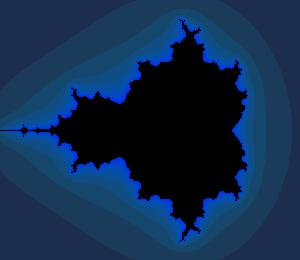

In [42]:
DisplayFractal(ns.eval())

In [43]:
ns

<tf.Variable 'Variable_9:0' shape=(260, 300) dtype=float32_ref>